# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_banco = pd.read_csv('previsao_de_renda.csv')
df_banco.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


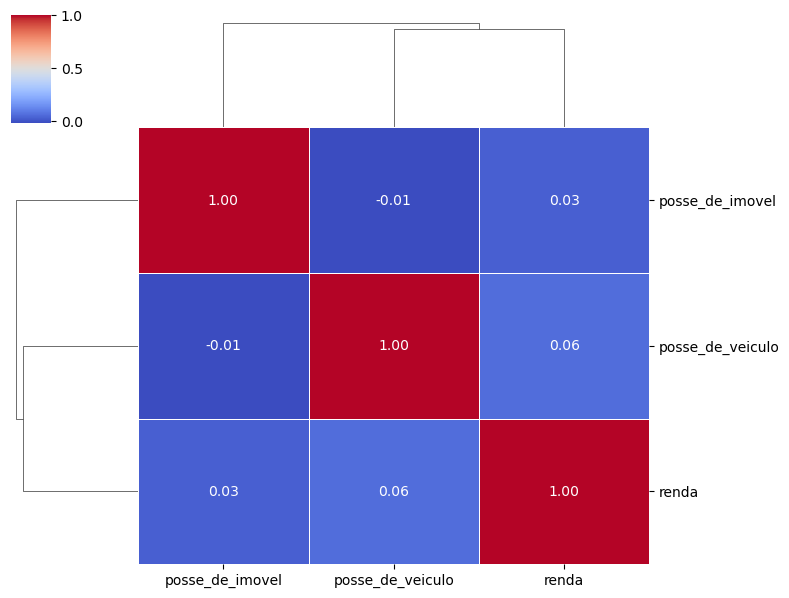

In [5]:
df_banco_2 = df_banco.loc[:,['posse_de_veiculo', 'posse_de_imovel','renda']]
correlacao_matrix = df_banco_2.corr()

sns.clustermap(correlacao_matrix,
               cmap="coolwarm",      
               annot=True,           
               fmt=".2f",            
               linewidths=0.5,      
               figsize=(8, 6))       

plt.show()

Fazendo uma matriz de correlação, podemos ver uma baixa relação entre as variaveis, não sendo uma boa preditora a renda. 

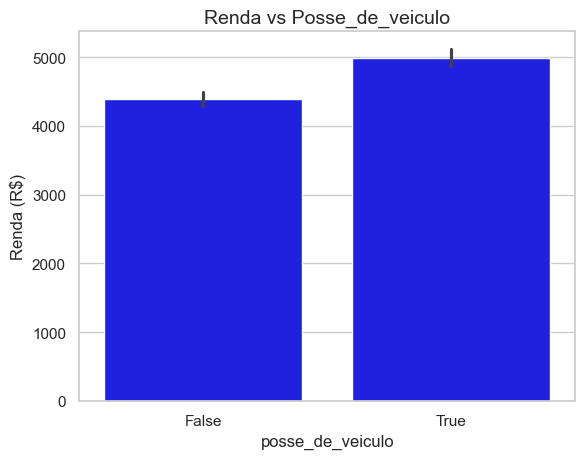

In [14]:
sns.set(style="whitegrid")
sns.barplot(data=df_banco_2, x='posse_de_veiculo', y='renda', color='blue')
plt.title('Renda vs Posse_de_veiculo', fontsize=14)
plt.xlabel('posse_de_veiculo', fontsize=12)
plt.ylabel('Renda (R$)', fontsize=12)
plt.show()

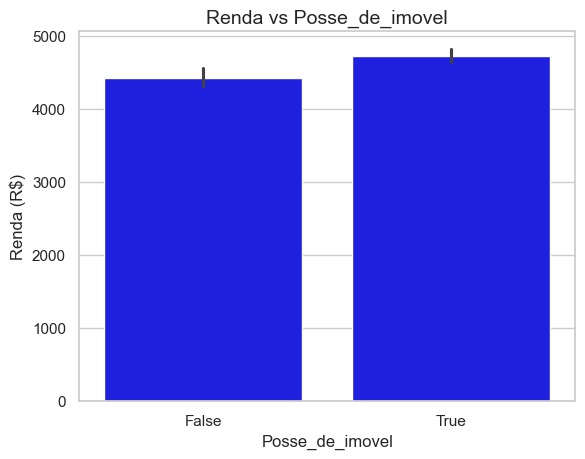

In [15]:
sns.set(style="whitegrid")
sns.barplot(data=df_banco_2, x='posse_de_imovel', y='renda', color='blue')
plt.title('Renda vs Posse_de_imovel', fontsize=14)
plt.xlabel('Posse_de_imovel', fontsize=12)
plt.ylabel('Renda (R$)', fontsize=12)
plt.show()

Podemos ver nessa amostra que essas variaveis não trazem uma grande diferença de renda. 

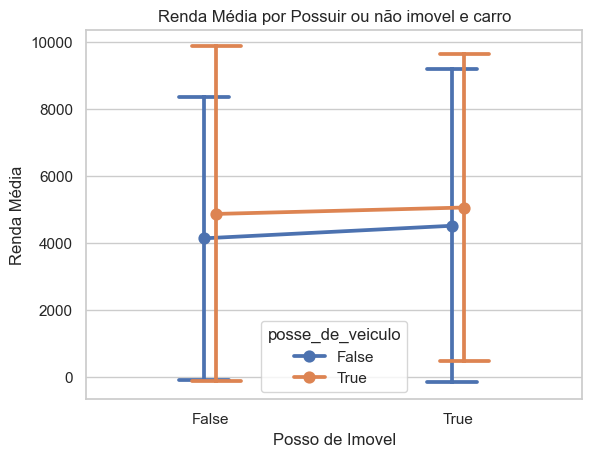

In [17]:
sns.pointplot(data=df_banco_2, x='posse_de_imovel', y='renda', hue='posse_de_veiculo', capsize=0.2, dodge=True, errorbar='sd') # errorbar='sd' calcula o desvio padrão automaticamente
plt.title("Renda Média por Possuir ou não imovel e carro")
plt.xlabel("Posso de Imovel")
plt.ylabel("Renda Média")
plt.show()

In [ ]:
Nessa amostragem, o desvio padrão esta bem grande, demonstrando uma maior variabilidade na base de dados. 

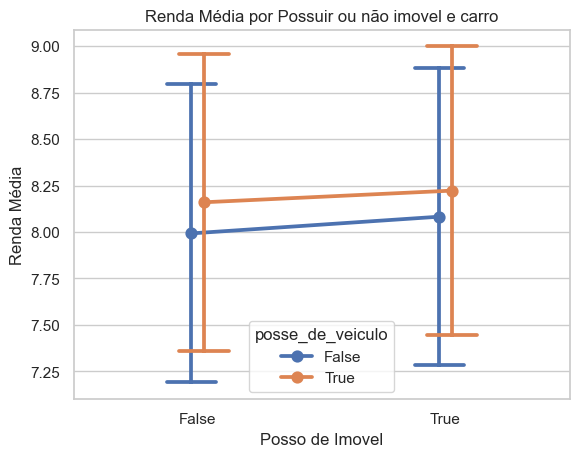

In [26]:
df_banco_log = df_banco.copy()
df_banco_log['log_renda'] = np.log(df_banco_log['renda'])
correlacao_matriz = df_banco_log['log_renda'].corr(df_banco_2['posse_de_imovel'])

sns.pointplot(data=df_banco_log, x='posse_de_imovel', y='log_renda', hue='posse_de_veiculo', capsize=0.2, dodge=True, errorbar='sd') # errorbar='sd' calcula o desvio padrão automaticamente
plt.title("Renda Média por Possuir ou não imovel e carro")
plt.xlabel("Posso de Imovel")
plt.ylabel("Renda Média")
plt.show()

Tirando como base as amostragens acima de erro padrão e correlação, as variaveis posse de imovel ou carro não tem base estatistica relevante para determinar a renda. 